# Librerías que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Lectura del archivo de datos en un dataframe

In [2]:
# Ruta al fichero (cámbiala según tu necesidad)
file_path = './laguna_datos_horarios_rellenos.csv'

# Cargar el fichero en un DataFrame
df = pd.read_csv(file_path)
#Mostramos cuantas filas y columnas se han cargado en total
print(f"Se han cargado {df.shape[0]} filas y {df.shape[1]} columnas")
# Mostrar las primeras filas para verificar
print(df.head())


Se han cargado 2113 filas y 4 columnas
             fecha  temperatura   ambiente  nivel
0  17/06/2023 0:00       31.500  22.000000   51.0
1  17/06/2023 1:00       31.470  21.780000   51.0
2  17/06/2023 2:00       31.235  21.201000   47.8
3  17/06/2023 3:00       31.295  22.439250   52.0
4  17/06/2023 4:00       31.375  23.058375   50.0


## Creamos un gráfico para mostrar la temperatura

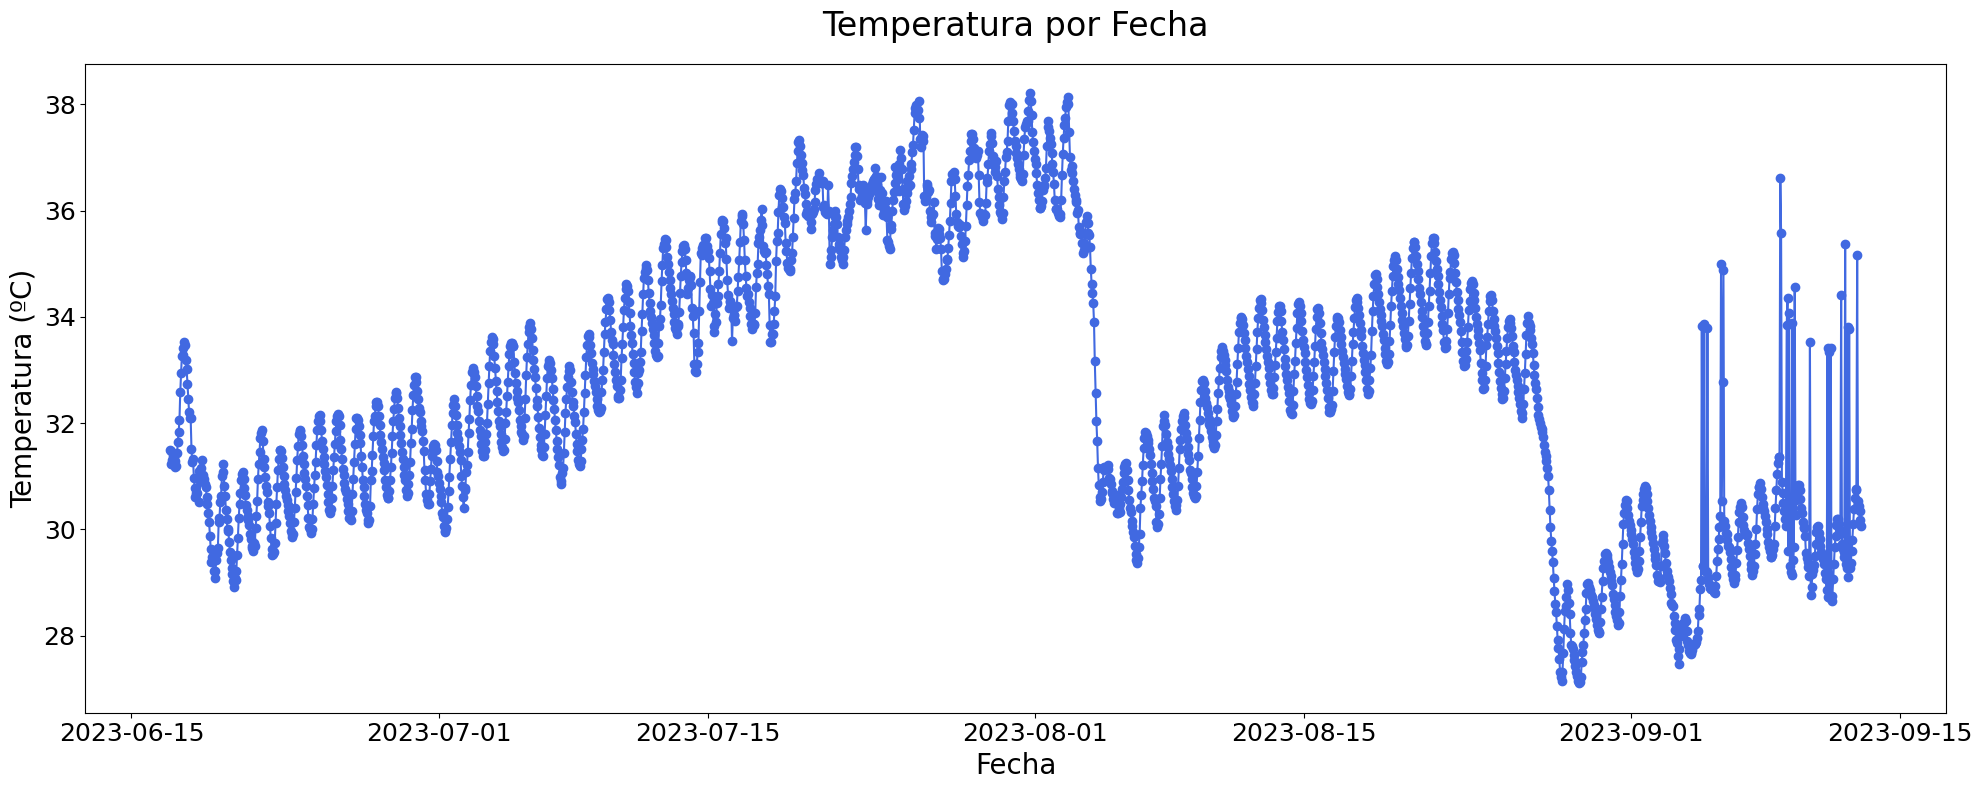

In [3]:
# Asegurarnos de que la columna "fecha" esté en formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

# Crear el gráfico de líneas

# Crear una figura con un tamaño personalizado
plt.figure(figsize=(20, 8))  

# Gráfico de líneas con marcadores circulares
plt.plot(df['fecha'], df['temperatura'], label='Temperatura', color='royalblue', marker='o')

# Título y etiquetas de los ejes 
plt.title('Temperatura por Fecha', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)

# Desactivar cuadrícula inicial y configurar estilo de cuadrícula
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7)  
plt.grid(False)

#  Ajustar el gráfico para evitar solapamientos y mostrarlo
plt.tight_layout()
plt.show()

# Preprocesamiento

Se puede observar como en los datos posteriores al 1 de septiembre tenemos algún dato anómalo (outlier). Para identificar posibles outliers, podemos usar el método del rango intercuartílico (IQR). Este método es robusto frente a distribuciones no normales y puede eliminar estos datos anómalos.

In [4]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['temperatura'].quantile(0.25)
Q3 = df['temperatura'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['temperatura'] < limite_inferior) | (df['temperatura'] > limite_superior)]

print(f'Número de outliers encontrados: {len(outliers)}')
# Mostrar los outliers encontrados
if len(outliers) != 0:
    print(outliers)

Número de outliers encontrados: 0


Como se puede observar, este tratamiento basado en el rango intercuartílico (IQR) no es efectivo para identificar los valores anómalos en este caso de la manera en la que se ha realizado, ya que las temperaturas se encuentran dentro de un rango considerado normal según este criterio. Sin embargo, al analizar los datos, podemos observar lo que parecen ser tres tramos donde los intervalos de temperatura son distintos. 

En el gráfico de la serie temporal de la temperatura, se pueden identificar claramente los tres tramos o intervalos de comportamiento:

- Primer tramo: Al inicio, la temperatura muestra fluctuaciones moderadas, oscilando en un rango relativamente estrecho. Las variaciones en esta fase son más suaves y consistentes.
- Segundo tramo: Se observa un ascenso gradual de la temperatura, con un patrón más estable que alcanza su punto máximo antes de una notable caída alrededor de agosto.
- Tercer tramo: En este periodo final, después de la caída abrupta, la temperatura exhibe una mayor variabilidad, con picos y valles más pronunciados. En este tramo es donde se identifican varios outliers, representados por puntos significativamente alejados del comportamiento típico, lo que indica anomalías. Estas anomalías se deben a variaciones bruscas de más de 5 grados en una sola hora, seguidas de un descenso similar en la hora siguiente, un comportamiento que no sigue los patrones observados previamente.

## Creamos un Boxplot para observar la distribución



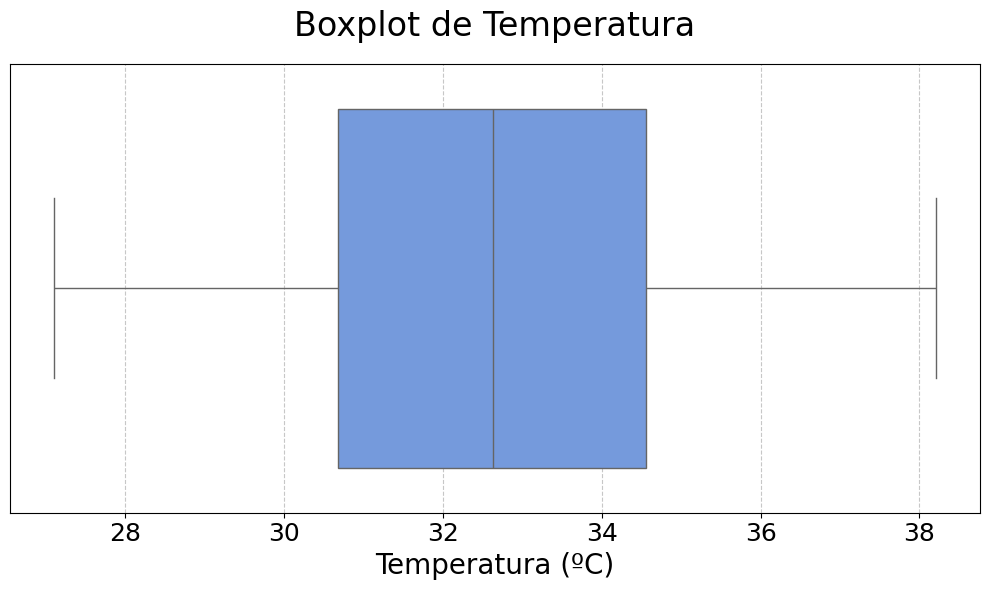

In [5]:
# Crear el boxplot

# Crear la figura con tamaño ajustado
plt.figure(figsize=(10, 6))

# Colores personalizados para el boxplot usando Seaborn (aunque con Matplotlib)
sns.boxplot(x=df['temperatura'], color='cornflowerblue')

# Título y etiquetas de ejes con tamaños de letra personalizados
plt.title('Boxplot de Temperatura', fontsize=24, pad = 20)
plt.xlabel('Temperatura (ºC)', fontsize=20)

# Ajustar el estilo del gráfico
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=18)  
plt.yticks([])  

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Tratamiento de los datos anómalos

Primero seleccionaremos los datos correspondientes al tercer tramo, desde el 28 de agosto de 2023 hasta el final. Luego, visualizaremos nuevamente el boxplot, donde podremos observar que ahora se detectan outliers.

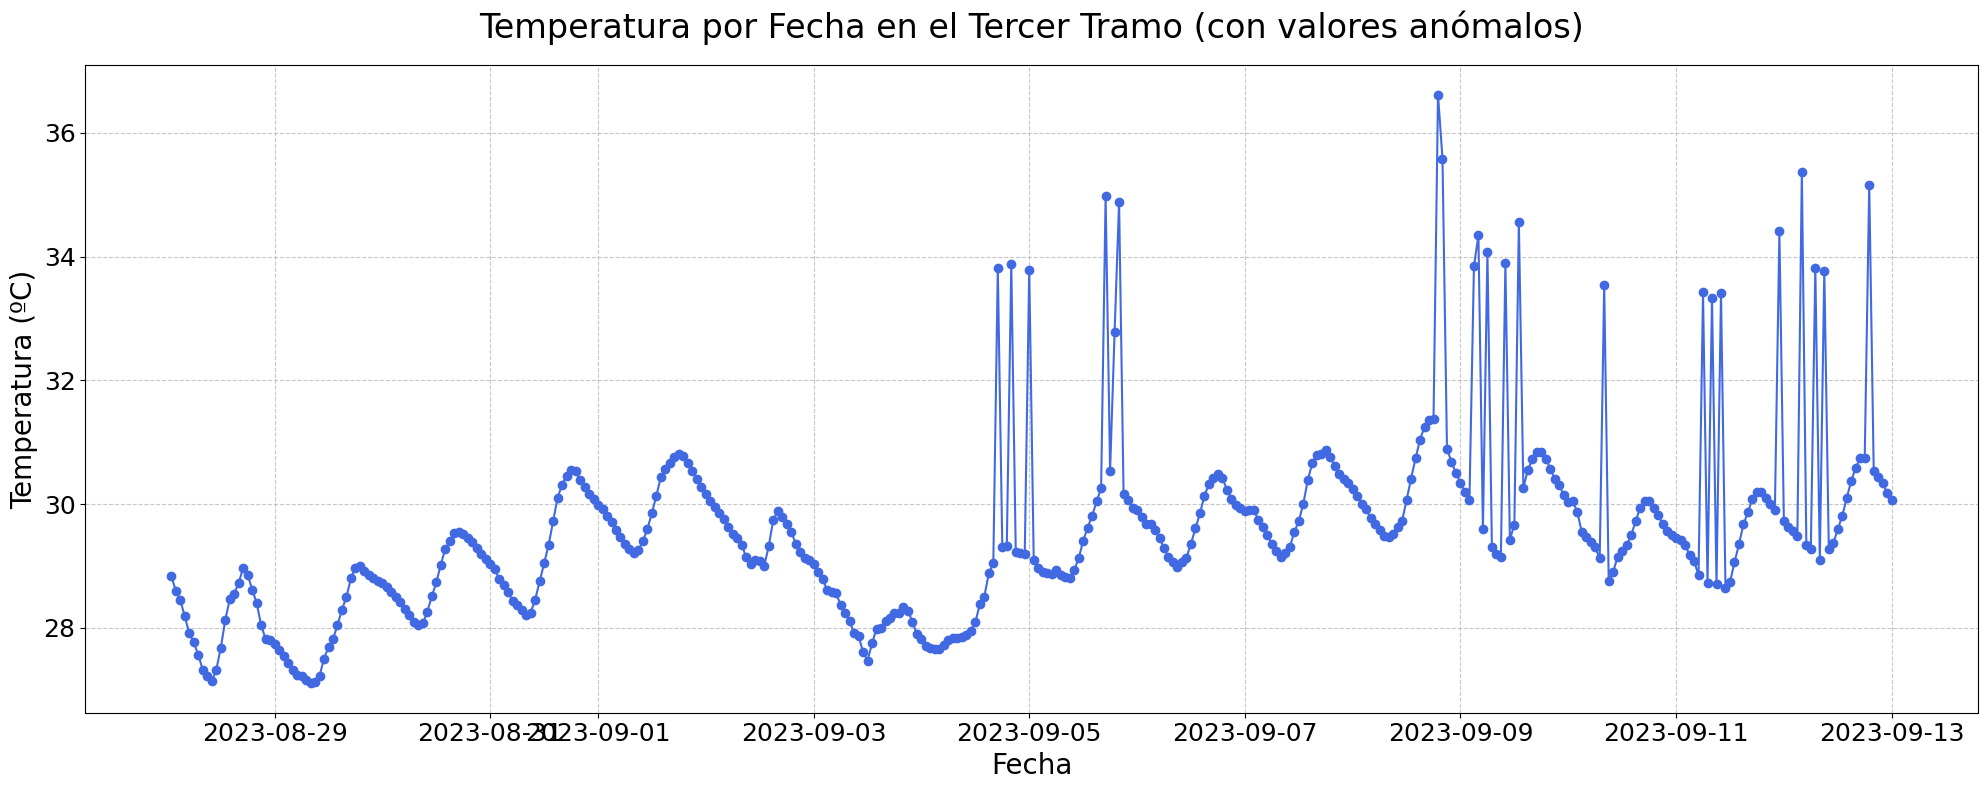

In [6]:
# Seleccionar solo los datos del tercer tramo 
tercer_tramo = df[df['fecha'] > '2023-08-28']

# Crear el gráfico de líneas

plt.figure(figsize=(20, 8))  
plt.plot(tercer_tramo['fecha'], tercer_tramo['temperatura'], label='Temperatura', color='royalblue', marker='o')
plt.title('Temperatura por Fecha en el Tercer Tramo (con valores anómalos)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

### Pintamos el boxplot

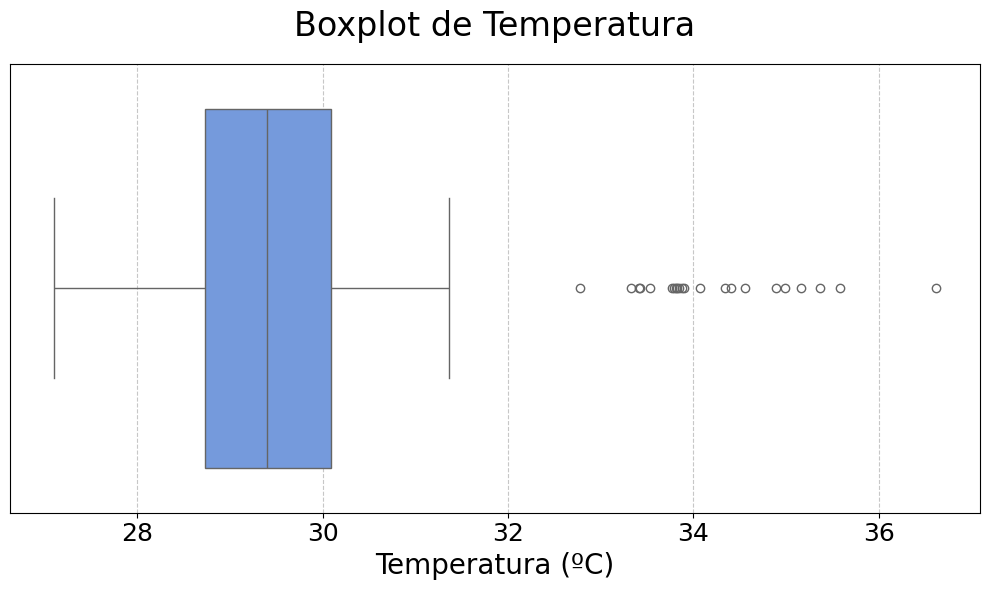

In [7]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=tercer_tramo['temperatura'], color='cornflowerblue')
plt.title('Boxplot de Temperatura', fontsize=24, pad = 20)
plt.xlabel('Temperatura (ºC)', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=18)  
plt.yticks([])  
plt.tight_layout()
plt.show()

### Limpieza de valores anómalos

In [8]:
# Detectar outliers en el tercer tramo usando IQR

Q1 = tercer_tramo['temperatura'].quantile(0.25)
Q3 = tercer_tramo['temperatura'].quantile(0.75)
IQR = Q3 - Q1

# Limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar outliers solo en el tercer tramo
outliers_tercer_tramo = tercer_tramo[(tercer_tramo['temperatura'] < limite_inferior) | (tercer_tramo['temperatura'] > limite_superior)]

# Mostrar los outliers detectados
print("Lista de valores anómalos")
print(outliers_tercer_tramo)

# Tratar los outliers. Eliminamos los outliers del tercer tramo
tercer_tramo.loc[~((tercer_tramo['temperatura'] >= limite_inferior) & (tercer_tramo['temperatura'] <= limite_superior)), 'temperatura'] = np.nan

Lista de valores anómalos
                   fecha  temperatura  ambiente  nivel
1913 2023-09-04 17:00:00      33.8175     27.81   36.0
1916 2023-09-04 20:00:00      33.8725     26.16   36.0
1920 2023-09-05 00:00:00      33.7900     25.62   37.0
1937 2023-09-05 17:00:00      34.9850     27.92   36.0
1939 2023-09-05 19:00:00      32.7750     27.42   45.0
1940 2023-09-05 20:00:00      34.8875     27.06   36.0
2011 2023-09-08 19:00:00      36.6150     26.06   35.0
2012 2023-09-08 20:00:00      35.5800     25.37   35.0
2019 2023-09-09 03:00:00      33.8425     24.11   36.0
2020 2023-09-09 04:00:00      34.3450     22.08   37.0
2022 2023-09-09 06:00:00      34.0700     21.32   36.0
2026 2023-09-09 10:00:00      33.8925     25.14   35.0
2029 2023-09-09 13:00:00      34.5550     26.96   43.0
2048 2023-09-10 08:00:00      33.5325     21.83   36.0
2070 2023-09-11 06:00:00      33.4200     22.19   35.0
2072 2023-09-11 08:00:00      33.3300     22.13   36.0
2074 2023-09-11 10:00:00      33.4075  

Al visualizar los valores, podemos observar que los valores anómalos han sido eliminados, pero ahora se detectan algunos huecos en los datos.

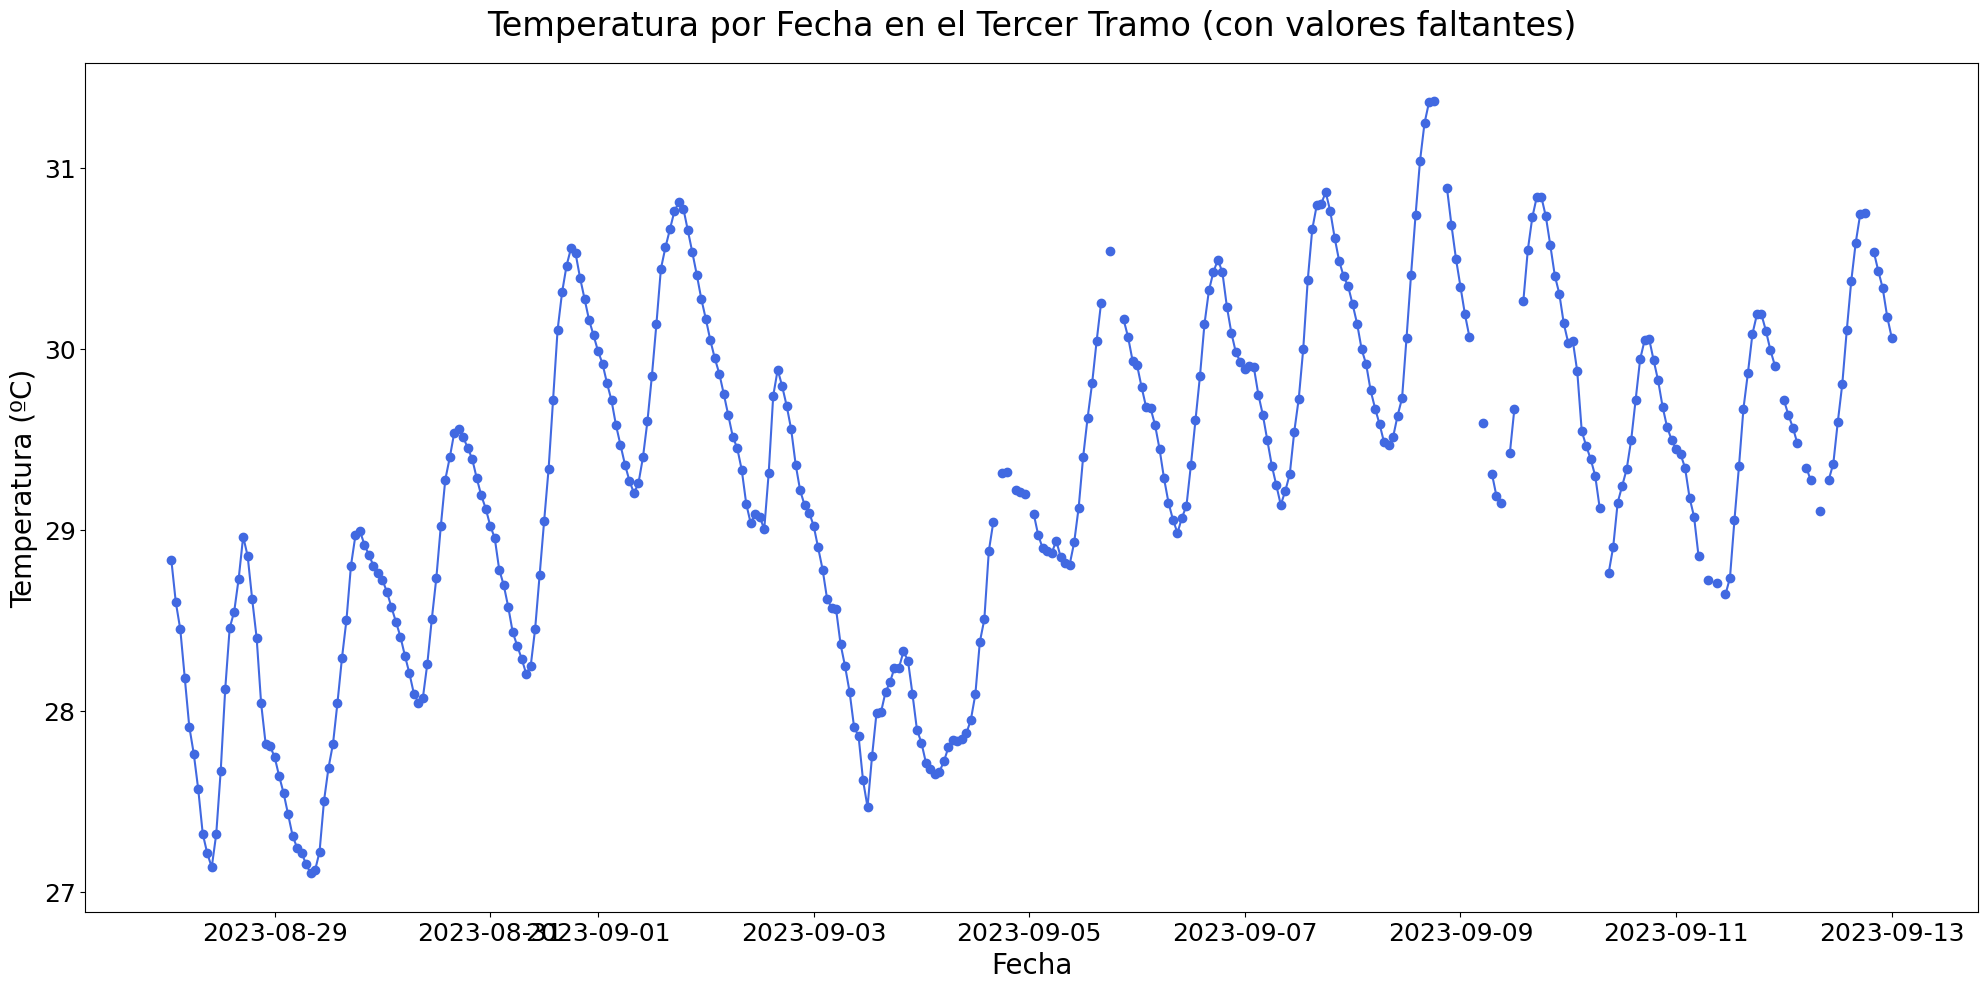

In [9]:
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear el gráfico
plt.figure(figsize=(20, 10))  
plt.plot(tercer_tramo['fecha'], tercer_tramo['temperatura'], label='Temperatura', color='royalblue', marker='o')
plt.title('Temperatura por Fecha en el Tercer Tramo (con valores faltantes)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

### Rellenar valores faltantes

Para solucionar este pequeño hueco en los datos, dado que los valores faltantes no son muchos (específicamente, 22 según el listado anterior), utilizaremos la interpolación lineal para rellenar esos vacíos. Este método nos permitirá estimar los valores faltantes de manera continua. Una vez realizada la interpolación, verificaremos que ya no hay huecos en nuestros datos.

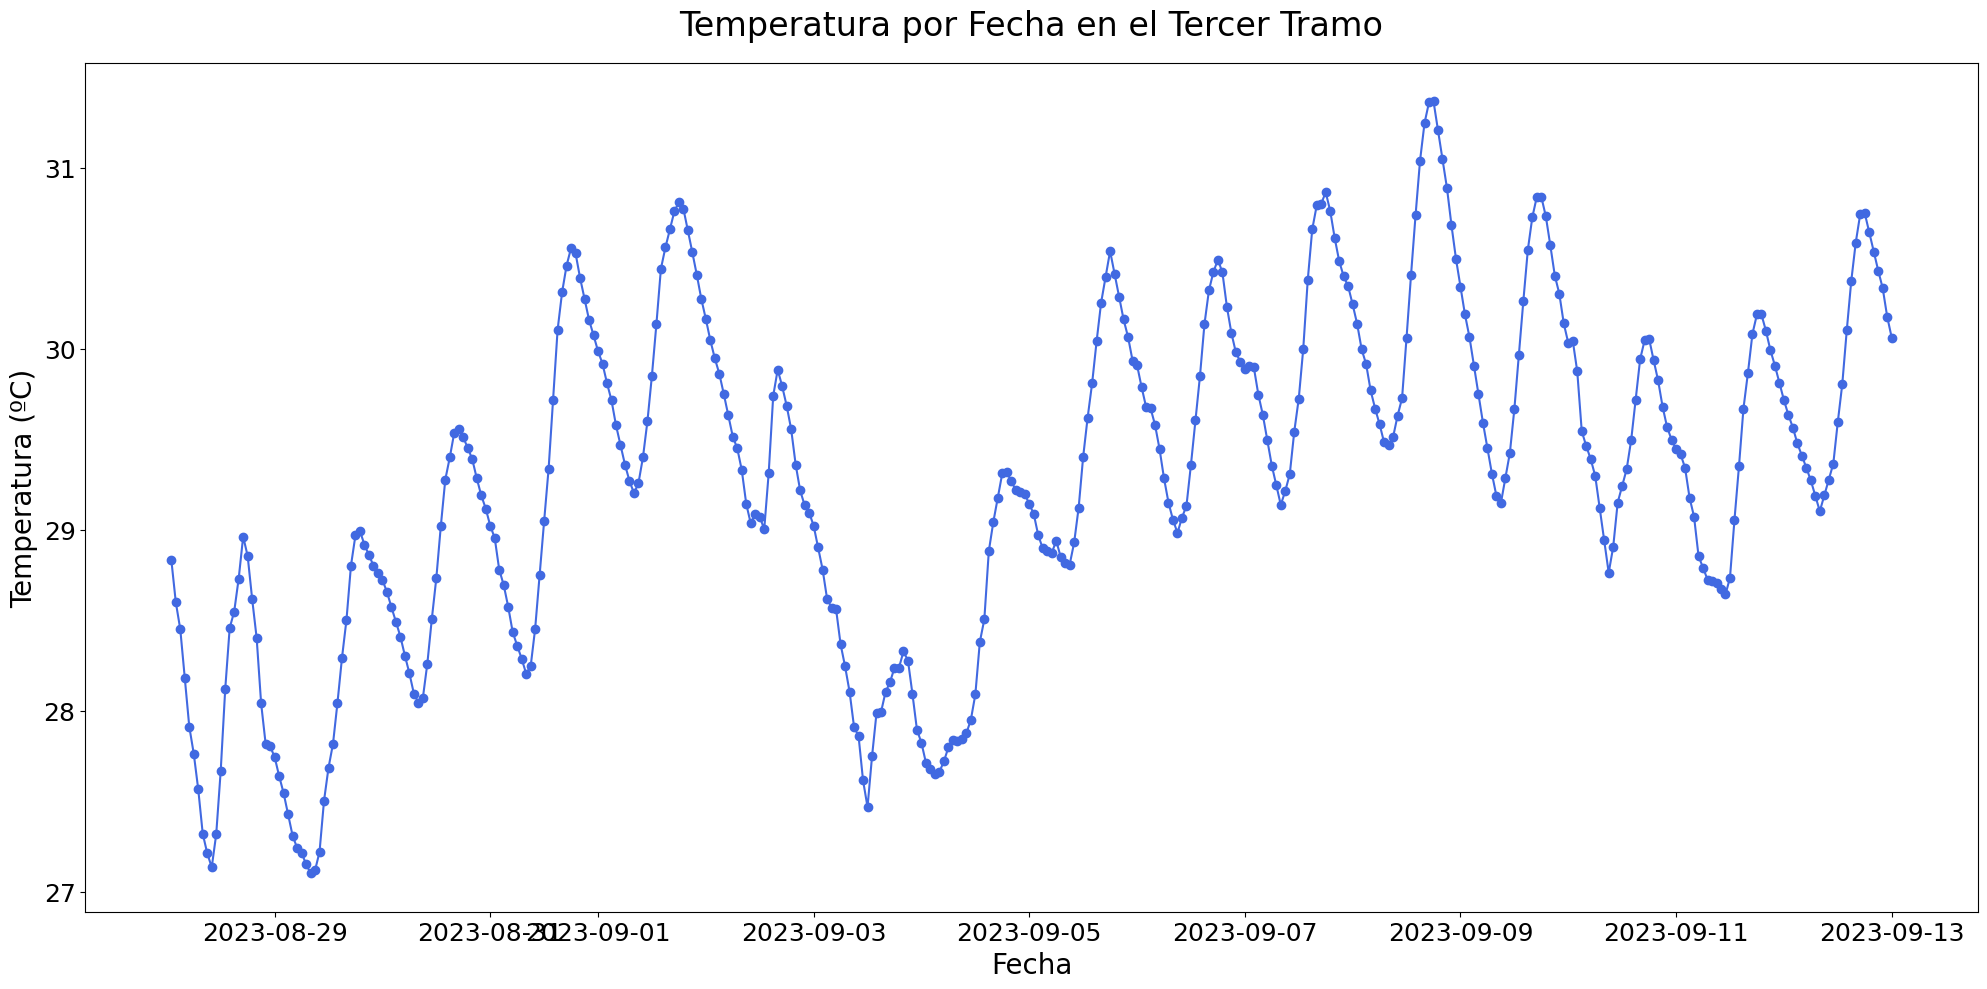

In [10]:


# Interpolar valores faltantes (NaN) en la columna de temperatura
tercer_tramo.loc[:, 'temperatura'] = tercer_tramo['temperatura'].interpolate(method='linear')

# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))  
plt.plot(tercer_tramo['fecha'], tercer_tramo['temperatura'], label='Temperatura', color='royalblue', marker='o')
plt.title('Temperatura por Fecha en el Tercer Tramo', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


### Unificar los datos

Por último, queda unificar este tercer tramo corregido con el resto de datos.

In [11]:
# Obtener los dos primeros tramos que no habíamos modificado
primer_segundo_tramo = df[df['fecha'] <= '2023-08-28']

# Concatenamos el primer y segundo tramo con el tercero.
df_concatenado = pd.concat([primer_segundo_tramo, tercer_tramo], ignore_index=True)

# Asegurarse de que la columna 'fecha' esté en formato de datetime
df_concatenado['fecha'] = pd.to_datetime(df_concatenado['fecha'])

# Ordenamos por la columna 'fecha'
df_concatenado = df_concatenado.sort_values(by='fecha').reset_index(drop=True)


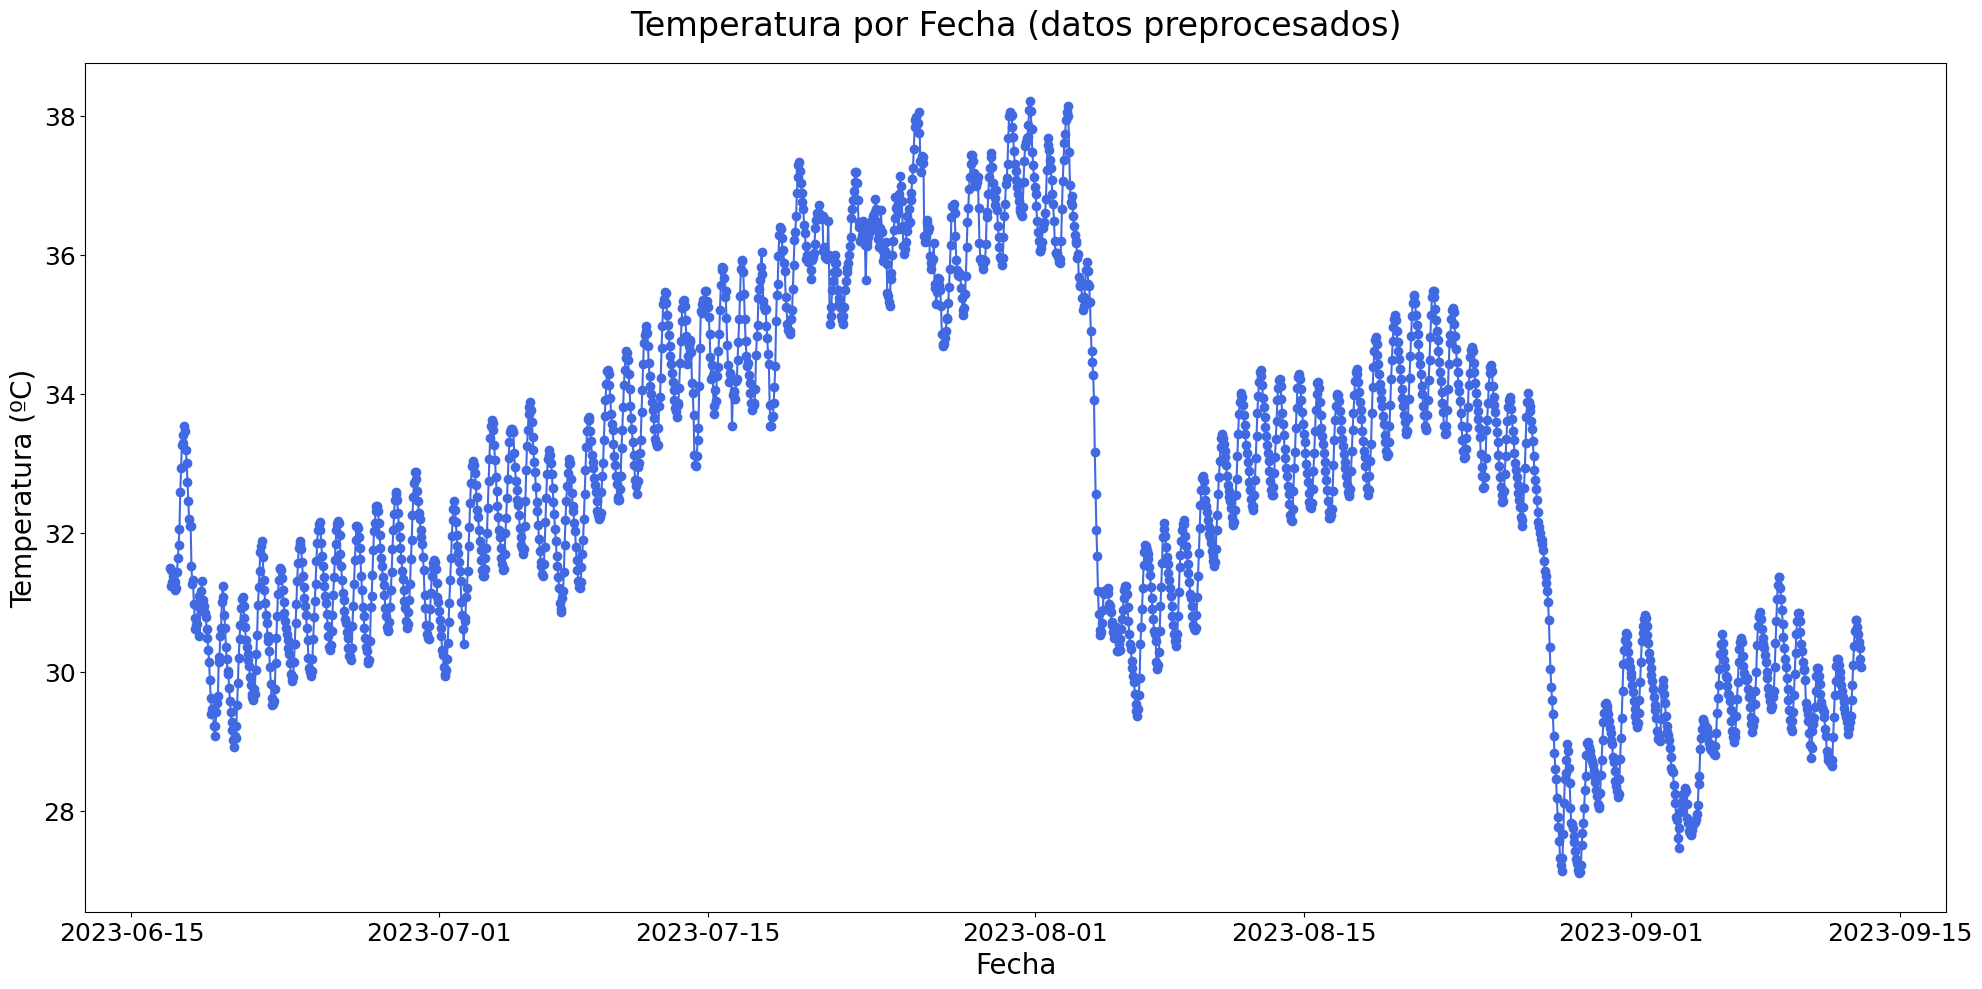

In [12]:
# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))  
plt.plot(df_concatenado['fecha'], df_concatenado['temperatura'], label='Temperatura', color='royalblue', marker='o')
plt.title('Temperatura por Fecha (datos preprocesados)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

## Comprobación de valores faltantes

Podemos comprobar si hay fechas faltantes generando un rango completo de fechas basado en el intervalo entre la fecha de inicio y la fecha de fin. Para ello, tomamos la primera y la última fecha de nuestros datos y creamos todas las fechas intermedias con la frecuencia especificada. En este caso, como trabajamos con datos horarios, usamos una frecuencia 'h' (horaria). Luego, comparamos este rango completo de fechas con las fechas presentes en nuestra columna utilizando el método difference. Esto nos permitirá identificar las fechas que deberían estar, pero que faltan en nuestros datos. Si no se encuentran diferencias, como es el caso en este ejemplo, significa que no hay fechas faltantes.

In [13]:
# Asegurarse de que la columna 'fecha' esté en formato de datetime
df_concatenado['fecha'] = pd.to_datetime(df_concatenado['fecha'])

# Crear un rango de fechas completo desde la primera hasta la última fecha con frecuencia horaria
fecha_inicio = df_concatenado['fecha'].min()
fecha_fin = df_concatenado['fecha'].max()
rango_fechas_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='h')

# Identificar las fechas que están presentes en el rango esperado, pero no en los datos reales
fechas_faltantes = rango_fechas_completo.difference(df_concatenado['fecha'])

print("Fechas faltantes:")
print(fechas_faltantes)

Fechas faltantes:
DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [14]:
df = df_concatenado

In [15]:
df.to_csv('laguna_datos_preprocesados.csv')

# Separación del dataframe en train y test (80%-20%)

## Esta separación es aleatoria, ¿valdría para este problema?

In [16]:
# test_size = 0.20 Especifica que el 20% del dataset original se asignará al conjunto de prueba.
# random_state fija la semilla para la generación de números aleatorios, garantiza que siempre se realiza la misma división.
train_df_random, test_df_random = train_test_split(df, test_size=0.20, random_state=42)

print(f"Número de registros en el conjunto de entrenamiento: {train_df_random.shape[0]}")
print(f"Número de registros en el conjunto de prueba: {test_df_random.shape[0]}")

Número de registros en el conjunto de entrenamiento: 1690
Número de registros en el conjunto de prueba: 423


### Ejercicio: Separación de Series Temporales

**Contexto**: Estás trabajando con un conjunto de datos que representa una serie temporal. Para evaluar correctamente un modelo predictivo en este contexto, es esencial que el conjunto de prueba represente datos futuros no vistos durante el entrenamiento.

**Instrucciones**:

1. Carga el conjunto de datos desde el archivo `ruta/del/fichero.csv` (./laguna_datos_horarios_rellenos.csv).
2. Asegúrate de que el conjunto de datos esté ordenado cronológicamente por la columna "fecha".
3. Divide el conjunto de datos de manera que el 80% inicial se utilice para entrenamiento (`train_df`) y el 20% final para pruebas (`test_df`).
4. Imprime el número de registros en ambos conjuntos para verificar la división.

**Consejos**:
- No es necesario dividir los datos de forma aleatoria.
- Considera usar operaciones de índice con `pandas` para lograr la división.

**Objetivo**: Al final de este ejercicio, deberías tener dos DataFrames, `train_df` y `test_df`, que contengan el 80% inicial y el 20% final de los datos originales, respectivamente.


In [17]:
# Asegurarte de que el dataframe esté ordenado por fecha (en caso de que no lo esté)
df = df.sort_values(by='fecha')

# Calcular el índice de corte
cut_idx = int(len(df) * 0.8)

# Separar en train y test
train_df_seq = df.iloc[:cut_idx]
test_df_seq = df.iloc[cut_idx:]

print(f"Número de registros en el conjunto de entrenamiento: {train_df_seq.shape[0]}")
print(f"Número de registros en el conjunto de prueba: {test_df_seq.shape[0]}")

Número de registros en el conjunto de entrenamiento: 1690
Número de registros en el conjunto de prueba: 423


# Muestra el resultado de la separación aleatoria y secuencial
***¿Qué diferencias ves?***

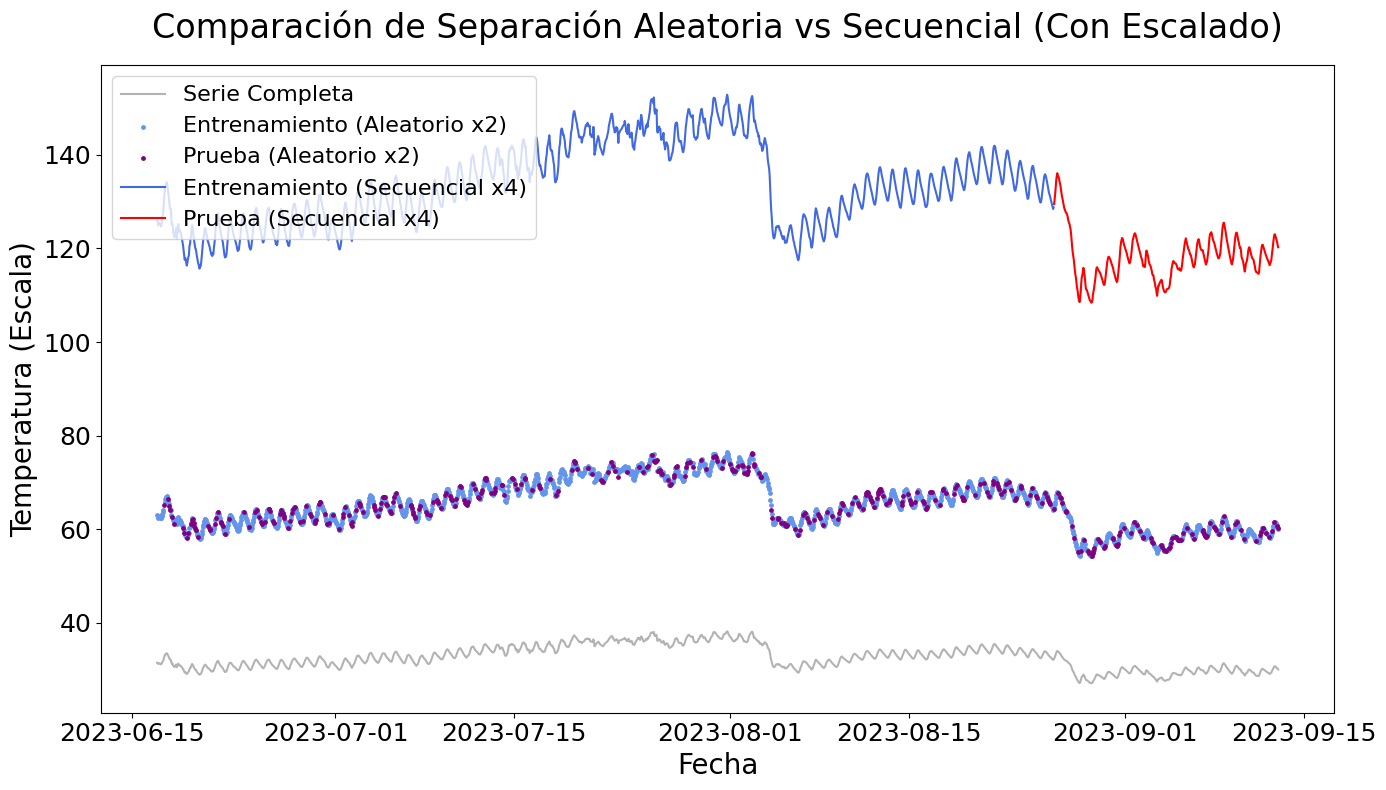

In [18]:
# Escalar valores de temperatura para la separación aleatoria
scale_train_random = train_df_random.copy()
scale_test_random = test_df_random.copy()

scale_train_random['temperatura'] *= 2
scale_test_random ['temperatura'] *= 2

# Escalar valores de temperatura para la separación secuencial
scale_train_seq = train_df_seq.copy()
scale_test_seq = test_df_seq.copy()

# Escalar valores de temperatura para la separación secuencial
scale_train_seq['temperatura'] *= 4
scale_test_seq['temperatura'] *= 4


# Gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Serie completa (sin escalar)
ax.plot(df['fecha'], df['temperatura'], label='Serie Completa', color='dimgrey', alpha=0.5)

# Puntos de separación aleatoria
ax.scatter(scale_train_random['fecha'], scale_train_random['temperatura'], marker='o', s=6, color='cornflowerblue', label='Entrenamiento (Aleatorio x2)')
ax.scatter(scale_test_random['fecha'], scale_test_random['temperatura'], marker='o', s=6, color='purple', label='Prueba (Aleatorio x2)')

# Separación secuencial
ax.plot(scale_train_seq['fecha'], scale_train_seq['temperatura'], color='royalblue', label='Entrenamiento (Secuencial x4)')
ax.plot(scale_test_seq ['fecha'], scale_test_seq ['temperatura'], color='red', label='Prueba (Secuencial x4)')

# Ajustes del gráfico
ax.set_title('Comparación de Separación Aleatoria vs Secuencial (Con Escalado)', fontsize=24, pad= 20)
ax.set_xlabel('Fecha', fontsize=20)
ax.set_ylabel('Temperatura (Escala)', fontsize=20)
ax.legend(loc='upper left', fontsize=16)
#ax.set_xticks(ax.get_xticks()[::int(len(df['fecha'])/10)])  # Reducing number of x-ticks for clarity
# ax.xaxis.set_tick_params(size=18)
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18)  


plt.tight_layout()
plt.show()